# --------------------------- House Grade Classification -------------------------

# Import Data & Python Packages

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split

In [22]:
# load dataset
House_Grade = pd.read_csv("DS3_C6_S2_Classification_HouseGrade_Data_Project.csv")
House_Grade

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


# SUMMARY - GETTING THE ROWS AS 3000 AND COLUMNS AS 14.

In [23]:
House_Grade.columns = ['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms', 'roof', 'Roof(Area)', 'Lawn(Area)','Nfloors','API','ANB','Expected price','Grade']
House_Grade.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


# 1. Data Exploration

In [24]:
House_Grade.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [26]:
#explore the numeric data types
House_Grade.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [27]:
#average numbers for all columns
House_Grade.groupby('Grade').mean()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
Grade,,,,,,,,,,,,
A,1563.228070,330.343358,8.952381,7.466165,7.057644,8.566416,62.303258,96.578947,6.045113,71.857143,3.533835,4456.583960
B,1438.842301,326.866419,8.437848,6.372913,5.862709,7.374768,53.825603,95.649351,5.421150,71.775510,3.435993,4247.224490
C,1512.629888,328.505587,7.250000,5.240223,4.727654,6.222067,53.717877,96.611732,4.243017,71.509777,3.611732,3887.370112
D,1500.308661,322.048031,5.800000,3.703150,3.173228,4.665354,42.516535,95.203937,2.761417,69.155906,3.422047,3360.353543
E,1497.381579,304.631579,5.105263,2.631579,1.973684,3.407895,8.065789,87.565789,2.118421,55.065789,3.197368,3031.289474


# Preparation of Data

In [28]:
#split dataset in features and target variable
feature_cols = ['Id', 'Grade', 'API', 'ANB','Trooms','Nfloors','Expected price']
X = House_Grade[feature_cols] # Features
y = House_Grade.Grade # Target variable

In [29]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2) 

# EXPOLATARY DATA ANALYSIS

In [30]:
House_Grade.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

# SUMMARY - SO HERE WE HAVE ZERO NULL VALUES.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Nbedrooms', ylabel='count'>

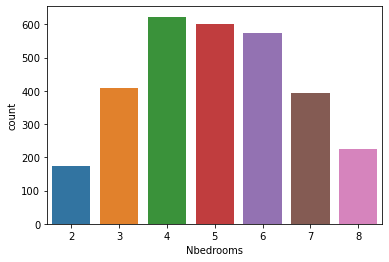

In [31]:
sns.countplot(House_Grade['Nbedrooms'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='roof', ylabel='count'>

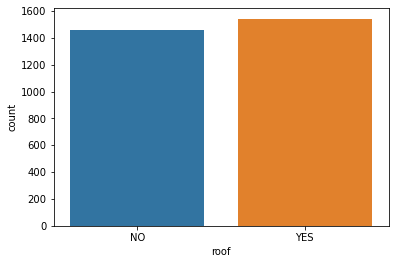

In [32]:
sns.countplot(House_Grade['roof'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Nbwashrooms', ylabel='count'>

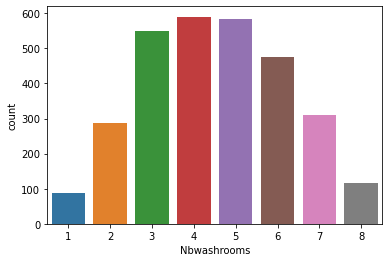

In [33]:
sns.countplot(House_Grade['Nbwashrooms'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Twashrooms', ylabel='count'>

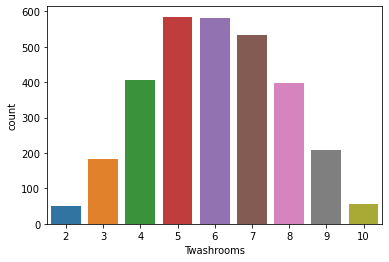

In [34]:
sns.countplot(House_Grade['Twashrooms'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Nfloors', ylabel='count'>

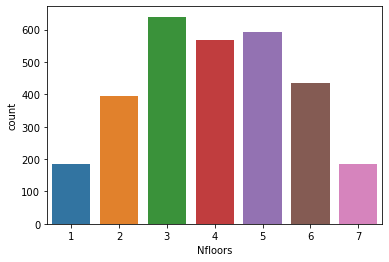

In [35]:
sns.countplot(House_Grade['Nfloors'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='API', ylabel='count'>

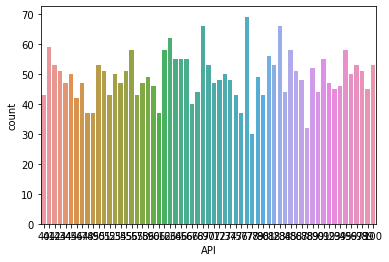

In [36]:
sns.countplot(House_Grade['API'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ANB', ylabel='count'>

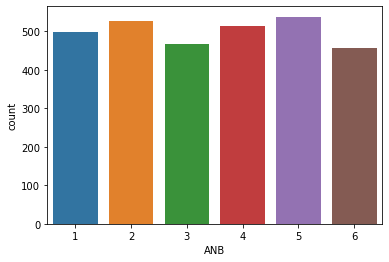

In [38]:
sns.countplot(House_Grade['ANB'])

# IMPORTING THE TWO MORE PYTHON LIBRARIES

In [44]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Correlation Coefficients w.r.t Sale Price')

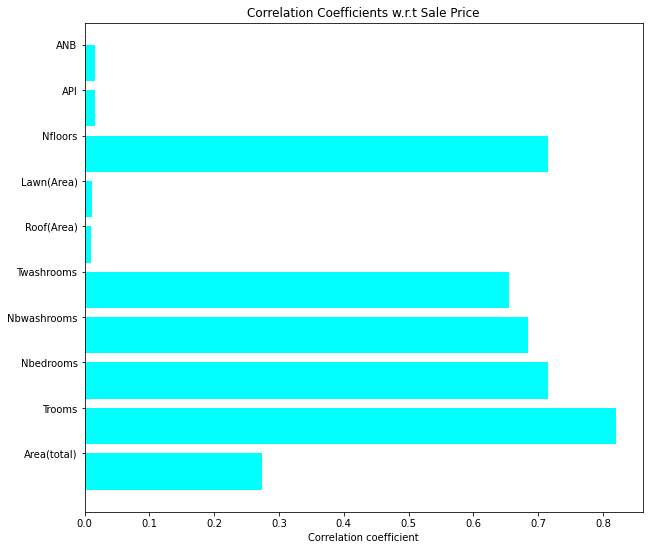

In [45]:
num_feat=House_Grade.columns[House_Grade.dtypes!=object]
num_feat=num_feat[1:-1]
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(House_Grade[col].values, House_Grade["Expected price"].values)[0,1])
ind = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots(figsize=(10,9))
rects = ax.barh(ind, np.array(values), color='cyan')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price")

# SUMMARY - About the graph ,just we can see that the Trooms have the correlation coefficient as 0.8 whic is the highest as compared to the others and some back it will come we will get the Nbedrooms as 0.7.

# Interpreatations = From the plot we can see that Lawn(Area) and Roof(Area),has the less coefficient of correlation as compared to others.

<AxesSubplot:>

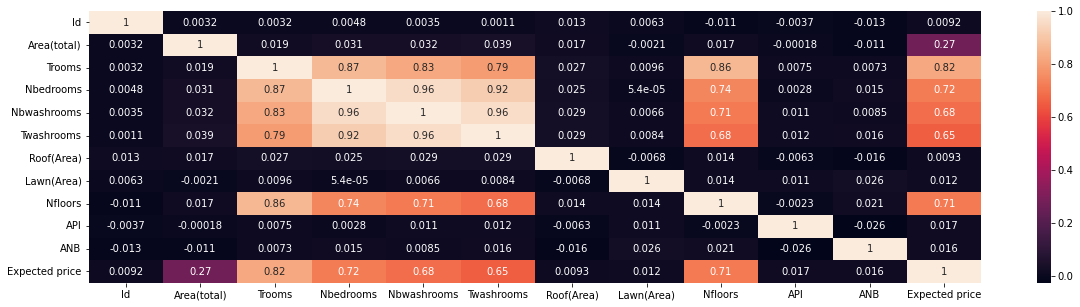

In [46]:
plt.figure(figsize=(20,5))
sns.heatmap(House_Grade.corr() , annot=True)

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_col=['roof','Grade']
for col in cat_col:
    House_Grade[col]=le.fit_transform(House_Grade[col])

In [49]:
House_Grade

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,2,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,3,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,4,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,5,320,7,4,4,5,0,0,75,3,40,1,3843,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,1,95,115,5,90,2,4246,1
2996,2997,292,9,8,7,8,1,116,87,7,97,4,3753,0
2997,2998,328,7,4,3,5,0,0,78,5,95,6,3607,3
2998,2999,293,9,7,7,8,0,0,78,7,51,3,4198,1


In [50]:
House_Grade['Grade'].unique()

array([3, 2, 1, 0, 4])

In [51]:
House_Grade.columns

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

In [52]:
House_Grade = House_Grade.drop(columns=['Id'])

In [53]:
House_Grade

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,320,7,4,4,5,0,0,75,3,40,1,3843,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,341,9,6,5,7,1,95,115,5,90,2,4246,1
2996,292,9,8,7,8,1,116,87,7,97,4,3753,0
2997,328,7,4,3,5,0,0,78,5,95,6,3607,3
2998,293,9,7,7,8,0,0,78,7,51,3,4198,1


In [57]:
X = House_Grade.drop(columns = ['Grade'])
y = House_Grade['Grade']

In [58]:
X

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,339,6,5,4,6,0,0,76,2,79,6,3481
1,358,5,4,3,4,1,71,96,3,72,4,3510
2,324,7,5,4,5,1,101,117,5,64,3,3748
3,330,6,4,3,5,1,101,82,2,59,2,3134
4,320,7,4,4,5,0,0,75,3,40,1,3843
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,341,9,6,5,7,1,95,115,5,90,2,4246
2996,292,9,8,7,8,1,116,87,7,97,4,3753
2997,328,7,4,3,5,0,0,78,5,95,6,3607
2998,293,9,7,7,8,0,0,78,7,51,3,4198


In [59]:
y

0       3
1       3
2       2
3       3
4       3
       ..
2995    1
2996    0
2997    3
2998    1
2999    2
Name: Grade, Length: 3000, dtype: int32

In [60]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3000, 12) (3000,)
(600, 12) (600,)
(2400, 12) (2400,)


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [62]:
rf = RandomForestClassifier(random_state=42)      
rf = rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [63]:
ac = accuracy_score(y_test, y_pred)
print('Accuracy score is: ',ac)

Accuracy score is:  0.8579166666666667


# SUMMARY  - Accuracy score is:  0.8579

In [64]:
y_test.head()

1801    2
1190    2
1817    3
251     2
2505    0
Name: Grade, dtype: int32

In [65]:
rf.predict(X_test)

array([2, 2, 3, ..., 1, 3, 3])

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
modelA = KNeighborsClassifier(n_neighbors = 40)
modelA.fit(X_train,y_train)
predicted_y = modelA.predict(X_test)
accuracy_knn = modelA.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.5816666666666667


In [70]:
y_test

1801    2
1190    2
1817    3
251     2
2505    0
       ..
814     1
1852    2
2220    2
2628    3
2105    3
Name: Grade, Length: 2400, dtype: int32

In [71]:
modelA.predict(X_test)

array([2, 3, 3, ..., 0, 3, 3])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
model2= DecisionTreeClassifier(max_depth = 4)
model2 = model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
accuracy_dt = model2.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7570833333333333


# SUMMARY - SO THE DECISION TREE ACCURACY OF MODEL2 IS : 0.757

In [74]:
y_test

1801    2
1190    2
1817    3
251     2
2505    0
       ..
814     1
1852    2
2220    2
2628    3
2105    3
Name: Grade, Length: 2400, dtype: int32

In [75]:
model2.predict(X_test)

array([2, 2, 3, ..., 1, 3, 3])

In [76]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [77]:
rk = AdaBoostClassifier(random_state=42)      
rk = rk.fit(X_train,y_train)
y_pred=rk.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy score is: ',ac)

Accuracy score is:  0.58125


# SUMMARY - SO THE ACCURACY SCORE IS 0.581.

In [78]:
y_test

1801    2
1190    2
1817    3
251     2
2505    0
       ..
814     1
1852    2
2220    2
2628    3
2105    3
Name: Grade, Length: 2400, dtype: int32

In [79]:
rk.predict(X_test)

array([2, 2, 4, ..., 1, 4, 4])

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
lr = LogisticRegression(random_state=42)      
lr = lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy score is: ',ac)

Accuracy score is:  0.5358333333333334


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SUMMARY - Accuracy score is:  0.5358

In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[109, 112, 105,   3,   0],
       [ 96, 108, 177,  46,   0],
       [ 26,  80, 198, 257,   0],
       [  2,  24, 129, 871,   0],
       [  0,   0,   1,  56,   0]], dtype=int64)

In [83]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [84]:
log_accuracy=accuracy_score(y_test, y_pred)
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred, average='weighted'))
print('precision:', precision_score(y_test, y_pred,average='weighted'))

accuracy: 0.5358333333333334
recall: 0.5358333333333334
f1-score: 0.5130556217118543
precision: 0.5012966704887162


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SUMMARY - accuracy: 0.535
# recall: 0.5358
# f1-score: 0.51305
# precision: 0.501

In [85]:
from sklearn.svm import SVC

In [86]:
rf = SVC(random_state=42)      
rf = rf.fit(X_train,y_train)

In [87]:
rf.score(X_test,y_test)

0.5604166666666667

# SUMMARY - rf .score is  0.56041

In [88]:
from sklearn.naive_bayes import GaussianNB

In [89]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [90]:
A = gnb.predict(X_test)
len(A)

2400

In [91]:
A = A.tolist()

In [98]:
B1 = y_test
B1

1801    2
1190    2
1817    3
251     2
2505    0
       ..
814     1
1852    2
2220    2
2628    3
2105    3
Name: Grade, Length: 2400, dtype: int32

In [101]:
B2 = B1.tolist()

In [102]:
B2

[2,
 2,
 3,
 2,
 0,
 1,
 1,
 0,
 1,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 0,
 3,
 0,
 2,
 3,
 2,
 1,
 3,
 0,
 0,
 0,
 3,
 3,
 2,
 1,
 3,
 2,
 3,
 2,
 1,
 3,
 3,
 1,
 2,
 1,
 1,
 1,
 0,
 3,
 3,
 1,
 1,
 2,
 3,
 1,
 3,
 2,
 3,
 0,
 2,
 2,
 2,
 2,
 1,
 3,
 1,
 3,
 3,
 2,
 1,
 3,
 0,
 3,
 3,
 3,
 1,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 2,
 3,
 4,
 3,
 0,
 0,
 3,
 0,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 2,
 3,
 1,
 2,
 1,
 3,
 2,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 1,
 2,
 4,
 2,
 4,
 0,
 0,
 0,
 3,
 3,
 2,
 1,
 2,
 3,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 3,
 3,
 1,
 3,
 2,
 2,
 1,
 3,
 0,
 3,
 2,
 3,
 3,
 3,
 3,
 1,
 3,
 0,
 0,
 0,
 1,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 1,
 0,
 3,
 3,
 3,
 1,
 1,
 1,
 2,
 0,
 1,
 3,
 3,
 2,
 3,
 0,
 2,
 3,
 3,
 1,
 2,
 3,
 3,
 0,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 2,
 1,
 3,
 3,
 2,
 2,
 3,
 1,
 3,
 4,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 1,
 3,
 2,
 2,
 2,


In [105]:
idx = 0
res = []
for i in A:
    if i != B[idx]:
        res.append(idx)
    idx = idx + 1

In [106]:
print("The index positions with mismatched values:\n",res)

The index positions with mismatched values:
 [5, 15, 21, 22, 23, 24, 25, 26, 34, 36, 46, 51, 53, 62, 63, 78, 80, 89, 94, 95, 97, 110, 111, 119, 122, 125, 127, 128, 133, 138, 139, 149, 155, 157, 161, 175, 181, 184, 190, 210, 222, 226, 229, 235, 238, 239, 242, 245, 255, 256, 267, 273, 281, 290, 292, 301, 306, 315, 324, 325, 328, 340, 344, 351, 355, 359, 367, 386, 387, 388, 394, 405, 406, 414, 415, 420, 422, 425, 432, 454, 461, 463, 466, 478, 481, 482, 484, 496, 498, 504, 506, 509, 515, 517, 522, 526, 528, 537, 540, 554, 556, 561, 567, 576, 581, 592, 609, 612, 622, 627, 629, 630, 631, 637, 640, 647, 650, 651, 672, 679, 680, 686, 687, 689, 695, 697, 712, 714, 719, 730, 732, 736, 746, 748, 756, 763, 770, 777, 780, 781, 801, 803, 804, 813, 823, 827, 832, 833, 839, 841, 842, 852, 853, 854, 855, 861, 876, 899, 902, 909, 915, 917, 919, 924, 926, 931, 933, 934, 937, 945, 950, 957, 961, 962, 965, 967, 976, 983, 986, 994, 1001, 1002, 1004, 1011, 1016, 1019, 1023, 1039, 1041, 1046, 1052, 1066, 1068

In [107]:
len(res)

448

# CONCLUSION = The model I got RandomForestClassifier) gives the maximum accuracy.

#                                           ---END--